In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import scipy
import ligo.skymap.plot

In [74]:
events = pd.read_hdf("/home/ethan.marx/projects/mdc_analytics/output/events.hdf5")

In [79]:
mask = events["H1:DMT-ANALYSIS_READY:1"] & events["L1:DMT-ANALYSIS_READY:1"]
mask &= events["chirp_mass"] > 10 
mask &= events["chirp_mass"] < 100
mask &= events["snr_net"] > 8
mask &= events["gstlal_graceid"].values != None
mask &= events["aframe_graceid"].values != None
filtered = events[mask]
print(len(filtered))

94


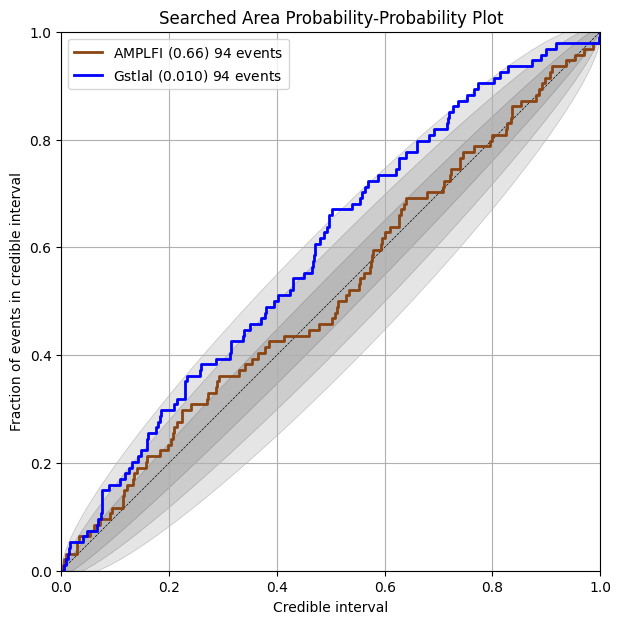

In [80]:
fig = plt.figure(figsize=(7, 7))
ax = fig.add_subplot(111, projection="pp_plot")

number_of_samples = len(filtered)
alphas = [0.68, 0.95, 0.997]
for alpha in alphas:
    ax.add_confidence_band(
        number_of_samples,
        alpha=alpha,
        color=(0, 0, 0, 0.1),
        edgecolor=(0, 0, 0, 0.2),
        annotate=False,
    )
ax.add_diagonal()
p = scipy.stats.kstest(filtered['aframe_searched_prob'], "uniform").pvalue
ax.add_series(
    filtered["aframe_searched_prob"],
    label="AMPLFI"
    + r"$~({0:#.2g})$ ".format(round(p, 2))
    + str(len(filtered))
    + " events",
    color="saddlebrown",
    linewidth=2,
)
p = scipy.stats.kstest(filtered['gstlal_searched_prob'], "uniform").pvalue
ax.add_series(
    filtered["gstlal_searched_prob"],
    label="Gstlal"
    + r"$~({0:#.2g})$ ".format(round(p, 2))
    + str(len(filtered))
    + " events",
    color="blue",
    linewidth=2,
)

plt.title("Searched Area Probability-Probability Plot")
ax.set_xlabel("Credible interval")
ax.set_ylabel("Fraction of events in credible interval")
ax.grid(True)
ax.legend()

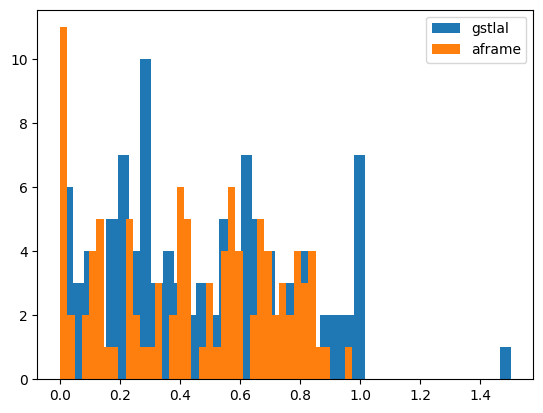

In [71]:
plt.hist(filtered["gstlal_searched_prob_vol"], label="gstlal", bins=40)
plt.hist(filtered["aframe_searched_prob_vol"], label="aframe", bins=40)
plt.legend()

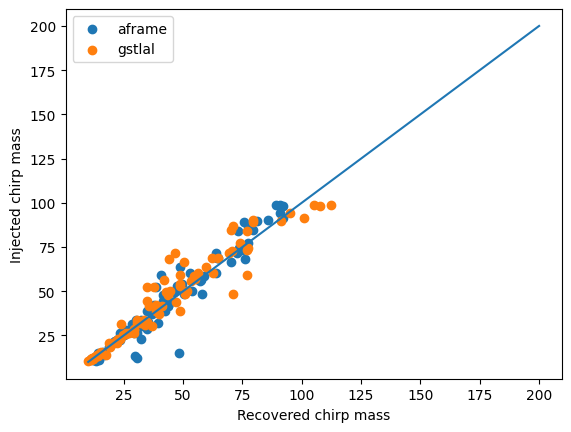

In [81]:
plt.scatter(filtered["aframe_chirp_mass"], filtered["chirp_mass"], label="aframe")
plt.scatter(filtered["gstlal_chirp_mass"], filtered["chirp_mass"], label="gstlal")
plt.xlabel("Recovered chirp mass")
plt.ylabel("Injected chirp mass")
plt.plot([10, 200], [10, 200])
plt.legend()

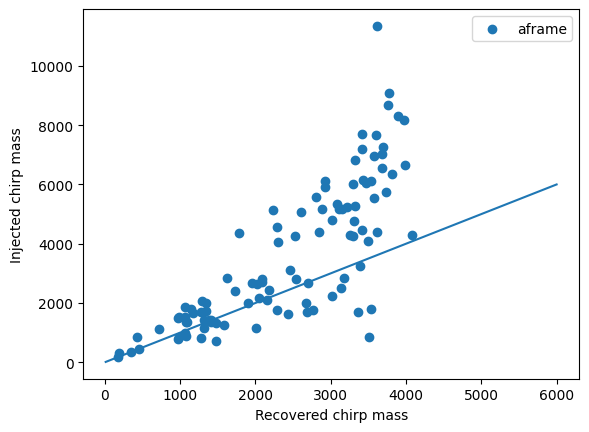

In [63]:
plt.scatter(filtered["aframe_luminosity_distance"], filtered["luminosity_distance"], label="aframe")
#plt.scatter(filtered["gstlal_chirp_mass"], filtered["chirp_mass"], label="gstlal")
plt.xlabel("Recovered chirp mass")
plt.ylabel("Injected chirp mass")
plt.plot([10, 6000], [10, 6000])
plt.legend()

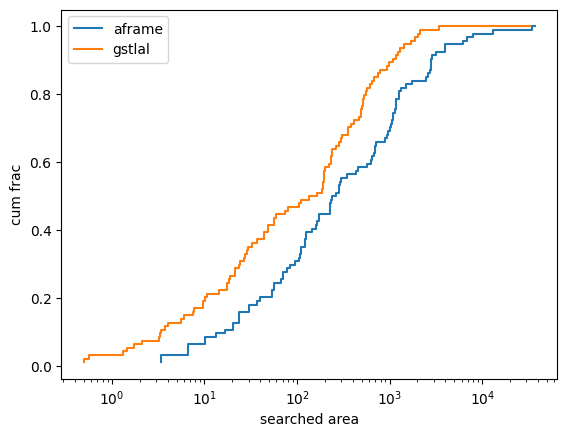

In [84]:
counts = np.arange(1, len(filtered) + 1) / len(filtered)
plt.step(np.sort(filtered["aframe_searched_area"]), counts, label="aframe")
plt.step(np.sort(filtered["gstlal_searched_area"]), counts, label="gstlal")
plt.xlabel("searched area")
plt.ylabel("cum frac")
plt.legend()
plt.xscale("log")

(array([  1.,   0.,   0.,   0.,   0.,   0.,   0.,   1.,   0.,   1.,   0.,
          1.,   1.,   1.,   1.,   1.,   0.,   2.,   3., 362.]),
 array([0.00726454, 0.05690131, 0.10653809, 0.15617486, 0.20581163,
        0.25544841, 0.30508518, 0.35472195, 0.40435872, 0.4539955 ,
        0.50363227, 0.55326904, 0.60290582, 0.65254259, 0.70217936,
        0.75181614, 0.80145291, 0.85108968, 0.90072645, 0.95036323,
        1.        ]),
 <BarContainer object of 20 artists>)

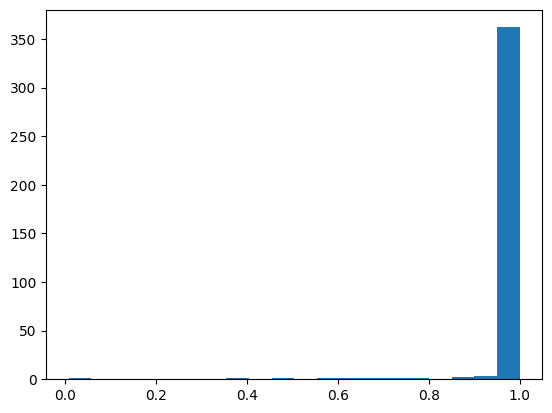

In [18]:
plt.hist(searched_prob, bins=20)